# Analyzing Stock Market Data to Build a Portfolio

## Project Goal

### Analyze share price data from various listings to answer the following questions:

1. What kind of Growth % do we expect from the various listings? <br>
2. How do the Growth % of the different listings correlate to each other? <br>
3. What is the estimated listing share price at a future date (prediction)? <br>
4. What kind of volatility do the listings have? <br>
5. How can we use our analysis to form a balanced investment portfolio? <br>

### Overall Methodology:

1. Import and organize data for the various listings <br>
2. Make observations about the data <br>
3. Use these observations to answer the questions <br>

## References

Share price information obtained from: [Yahoo Finance](https://finance.yahoo.com/) <br>
Yahoo Finance library: [yfinance](https://pypi.org/project/yfinance/) <br>

## Inputs

### Below are the inputs to perform the analysis

In [1]:
s_list='AM AAPL AMZN FB NVDA NFLX MSFT PYPL GOOGL TSLA ZNGA'  # List of "listings" to be analyzed
total_investment=3001  # Total investment value in USD
sample_interval ='1d'  # Time interval to fetch data at
start='11/27/2020'  # Start date of interest
end='01/09/2021'  # End date of interest
datetime_query=['01/31/2021'] # Datetime query values (for prediction)
pricetype='Close' # Open, Close, Low, High

## Import Libraries

In [2]:
# Python Version
import sys
sys.version

'3.6.12 | packaged by conda-forge | (default, Dec  9 2020, 00:36:02) \n[GCC 9.3.0]'

In [3]:
#Update python standard libraries install
!pip install --upgrade pip

# library to for array handling
import numpy as np 

# library for dataframes
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Linear Model
import sklearn as sk

# List Functions module
!pip install listfun
from listfun import Listoper as lst

# Math Module
import math

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# Machine-Learning and analysis modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

! pip install expsolver;
from expsolver import Solver as solve

# Module to handle XML and HTML 
! pip install lxml;

#Finance information import (Link in "Yahoo Finance" Markdown Cell in the "References" Section)
!pip install yfinance;
import yfinance as yf;

print('Libraries imported.')

Libraries imported.


## Import Data into DataFrame

In [4]:
end=pd.to_datetime(end)
#start=end-pd.to_timedelta(start)
start=pd.to_datetime(start)
print('Start: {}, End: {}'.format(start,end))

Start: 2020-11-27 00:00:00, End: 2021-01-09 00:00:00


### Create basic dataframe "df_info" containing all the available stocks information

In [5]:
# Create list of stock names as specified by the User
s_list=s_list.split(' ')

In [6]:
# Initialize Basic Dataframe as empty
df_info=pd.DataFrame() 

# Add Shares information for List of stock names
for item in s_list:
    data=yf.Ticker(item)
    df_data=data.history(period=sample_interval,start=start ,end=end )
    df_data=df_data.reset_index()
    df_data['Name']=pd.DataFrame([item for i in range(0,len(df_data))])
    df_info=pd.concat([df_info,df_data])
    

# Display basic information
df_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
0,2020-11-27,7.11,7.230,6.96,6.97,1942700,0.0,0,AM
1,2020-11-30,7.00,7.140,6.68,6.74,6180500,0.0,0,AM
2,2020-12-01,6.91,6.990,6.56,6.71,4219800,0.0,0,AM
3,2020-12-02,6.71,7.215,6.66,6.97,5154200,0.0,0,AM
4,2020-12-03,7.08,7.305,6.91,7.27,6597800,0.0,0,AM


In [7]:
# Size of Data:
print('Size of the full dataset is: {} by {}'.format(df_info.shape[0],df_info.shape[1]))

Size of the full dataset is: 319 by 9


## Exploratory Pre-Processing Analysis

### Create Dataframe (df) of Relevant share Price vs. date, which will be the data looked at in this analysis  

In [8]:
# Create new Dataframe of relevant Share Prices
datevalues=df_info['Date'].sort_values().drop_duplicates().tolist()
df=pd.DataFrame(index=datevalues,columns=s_list)
for item in s_list:
    df_item=df_info[df_info['Name']==item]
    for ind in df.index.tolist():
    #df[['Date',item]]=df_info.loc[df_info['Name']==item,['Date',pricetype]]
        try:
            df.loc[ind,item]=df_item.loc[df_item['Date']==ind,pricetype].values[0]
        except:
            pass
    df[item].fillna(method='bfill',inplace=True)
    df[item].fillna(method='ffill',inplace=True)

df_price=df
# Display initial few contents of the Dataset
df.tail(10)

,AM,AAPL,AMZN,FB,NVDA,NFLX,MSFT,PYPL,GOOGL,TSLA,ZNGA
2020-12-24,8.38,131.970001,3172.689941,267.399994,519.750000,513.969971,222.750000,238.639999,1734.160034,661.770020,9.91
2020-12-28,7.69,136.690002,3283.959961,277.000000,516.000000,519.119995,224.960007,235.729996,1773.959961,663.690002,9.73
2020-12-29,7.68,134.869995,3322.000000,276.779999,517.729980,530.869995,224.149994,231.029999,1757.760010,665.989990,9.61
2020-12-30,7.69,133.720001,3285.850098,271.869995,525.830017,524.590027,221.679993,231.509995,1736.250000,694.780029,9.72
2020-12-31,7.71,132.690002,3256.929932,273.160004,522.200012,540.729980,222.419998,234.199997,1752.640015,705.669983,9.87
2021-01-04,7.63,129.410004,3186.629883,268.940002,524.539978,522.859985,217.690002,231.919998,1726.130005,729.770020,9.77
2021-01-05,8.27,131.009995,3218.510010,270.970001,536.190002,520.799988,217.899994,234.910004,1740.050049,735.109985,9.84
2021-01-06,8.40,126.599998,3138.379883,263.309998,504.579987,500.489990,212.250000,226.830002,1722.880005,755.979980,9.60
2021-01-07,8.43,130.919998,3162.159912,268.739990,533.760010,508.890015,218.289993,235.039993,1774.339966,816.039978,9.84
2021-01-08,8.08,132.050003,3182.699951,267.570007,531.070007,510.399994,219.619995,242.460007,1797.829956,880.020020,9.92


### Display basic information about this dataset

In [9]:
# Display basic statistics of the opening prices
# Darker cells denote higher values
df.describe().style.background_gradient(axis=1).format("{:.2f}")

,AM,AAPL,AMZN,FB,NVDA,NFLX,MSFT,PYPL,GOOGL,TSLA,ZNGA
count,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00
mean,7.86,127.10,3193.18,275.10,528.75,514.14,217.59,226.53,1765.25,659.46,9.26
std,0.53,5.06,51.93,6.12,9.14,13.83,4.08,10.66,33.10,71.60,0.64
min,6.71,116.59,3101.49,263.31,504.58,490.70,210.52,210.80,1720.22,567.60,8.23
25%,7.63,122.94,3162.58,270.97,520.53,503.22,214.24,216.54,1736.25,609.99,8.69
50%,7.89,127.81,3186.63,275.55,531.07,514.48,217.69,230.20,1757.76,645.98,9.60
75%,8.28,131.01,3218.51,277.81,534.42,524.59,221.02,235.51,1787.02,694.78,9.84
max,8.44,136.69,3322.00,287.52,544.27,540.73,224.96,243.49,1824.97,880.02,9.99


### Create basic Time plot to look at pertinent information

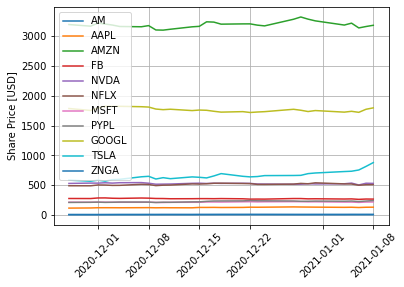

In [10]:
# Plot Open price vs. Time
ax= plt.subplot()
for item in df_price.columns:
    plt.plot(df_price[item])

plt.xticks(rotation=45)
ax.legend(df_price.columns)
plt.ylabel('Share Price [USD]')
ax.grid(True)

## What kind of Growth % do we see with the various listings?

### Normalize the opening price to determine Growth % over the period of interest

Normalize w.r.t. start price (df_start) <br> 
Normalization used: (price-start_price)/start_price*100 to obtain df_norm

In [11]:
# Normalization Function
def df_normalize(df):
    df_strt=df.iloc[0,:]
    df_norm=(df.iloc[:,:]-df_strt)/df_strt*100
    df_strt=pd.DataFrame(df_strt).transpose()
    df_strt.set_axis(['start_price'],axis=0,inplace=True)
    return [df_norm,df_strt]

# Store Normalized values in DataFrame and display results                          
[df_norm,df_start]=df_normalize(df)
df_norm.head()

,AM,AAPL,AMZN,FB,NVDA,NFLX,MSFT,PYPL,GOOGL,TSLA,ZNGA
2020-11-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-11-30,-3.299857,2.109964,-0.854371,-0.302364,1.057592,-0.134316,-0.538953,1.291450,-1.825385,-3.100252,0.243019
2020-12-01,-3.730269,5.257745,0.774252,3.146032,0.970866,2.690492,0.455332,2.436252,0.466697,-0.170718,0.121509
2020-12-02,0.000000,5.566520,0.256309,3.495192,2.135924,2.446276,0.065046,0.553478,2.123644,-2.891970,1.093562
2020-12-03,4.304164,5.446442,-0.269458,1.454234,1.045967,1.253664,-0.459969,1.490134,1.948492,1.300873,2.308634


In [12]:
df_start

,AM,AAPL,AMZN,FB,NVDA,NFLX,MSFT,PYPL,GOOGL,TSLA,ZNGA
start_price,6.97,116.589996,3195.340088,277.809998,530.293335,491.359985,215.229996,211.389999,1787.02002,585.76001,8.23


In [13]:
# Size of Data:
print('Size of the data is: {} by {}'.format(df_norm.shape[0],df_norm.shape[1]))

Size of the data is: 29 by 11


In [14]:
# Display basic statistics of the normalized prices
# Darker cells denote higher values
df_norm.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,AM,AAPL,AMZN,FB,NVDA,NFLX,MSFT,PYPL,GOOGL,TSLA,ZNGA
count,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
mean,12.7,9.0,-0.1,-1.0,-0.3,4.6,1.1,7.2,-1.2,12.6,12.5
min,-3.7,0.0,-2.9,-5.2,-4.8,-0.1,-2.2,-0.3,-3.7,-3.1,0.0
max,21.1,17.2,4.0,3.5,2.6,10.0,4.5,15.2,2.1,50.2,21.4


### Plot trends in Normalized values

Time Plot

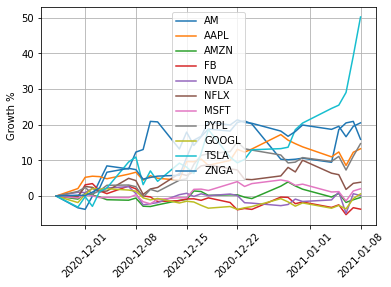

In [15]:
# Display Growth % over time
ax= plt.subplot()
for item in df_norm.columns:
    plt.plot(df_norm[item])

plt.xticks(rotation=45)
ax.legend(df.columns,loc='upper center')
plt.ylabel('Growth %')
ax.grid(True)

## How do the price gains of the listings correlate to each other?

Correlation Matrix

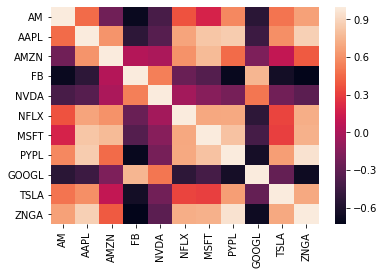

In [16]:
sns.heatmap(df_norm.corr());

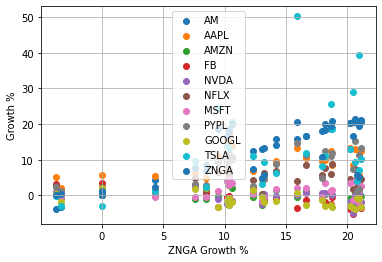

In [17]:
ax= plt.subplot()
for item in df_norm.columns:
    plt.scatter(df_norm.iloc[:,0],df_norm[item])

ax.legend(df_norm.columns,loc='upper center')
plt.xlabel('{} Growth %'.format(item))
plt.ylabel('Growth %')
ax.grid(True)

## Calculate percent and absolute estimate and bounds of Growth 

### Create a linear regression fit for the data with thrice the standard dev. of obs.-est. to determine the boundaries

<b> Linear Regression object, score and price boundaries for each listing </b>

In [18]:
def lin_obj(df):
    df_lin=df.iloc[0:1,:]
    df_lin.reindex(['fit_obj','score','bound'])
    df_lin.drop(index=df_lin.index[0],inplace=True)
    for item in df_lin.columns:
        # ... (intercept and coeff.) of the fits
        X=np.array(pd.to_numeric(df.index)).reshape(-1, 1)
        Y=(df[item].values).reshape(-1, 1)
        lin_list_coeff=[]
        lin_list_intercept=[]
        for i in range(0,1):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0)
            lin_obj=LinearRegression()
            lin_obj.fit(X_train,y_train)
            lin_list_coeff.append(lin_obj.coef_)
            lin_list_intercept.append(lin_obj.intercept_)
        linobj = LinearRegression()
        linobj.coef_=np.array(np.array(lin_list_coeff).mean()).reshape(-1)
        linobj.intercept_=np.array(np.array(lin_list_intercept).mean()).reshape(-1)
        score=linobj.score(X,Y)
        df_lin.loc['fit_obj',item]=linobj
        df_lin.loc['score',item]=score

    # Calculate price bounds
    df_est=pd.DataFrame()
    df_est.rename_axis(index='Datetime')
    df_est['Datetime']=df.index
    df_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_lin.loc['fit_obj',item]
        for datetime in df_est.index:
            est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            df_est.loc[datetime,'{}'.format(item)]=est
    for item in df.columns:
        df_diff=df[item]-df_est[item]
        bounds=3*df_diff.std()
        df_lin.loc['bound',item]=bounds
        
    return df_lin

Convert rise and fall from % to price (using price change= percent change/100*start price) and display.<br>

In [19]:
# Call lin_obj(...) to create the price estimation object dataframe
df_price_est_obj=lin_obj(df_norm)
df_price_bounds_dict={}
for item in df_norm.columns:
    df_price_bounds_dict[item]=df_price_est_obj.loc['bound',item]*df_start.loc['start_price',item]/100
df_price_bounds=pd.DataFrame(df_price_bounds_dict,index=['price_bounds'])
df_price_est_obj=df_price_est_obj.append(df_price_bounds)
df_price_est_obj

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AM,AAPL,AMZN,FB,NVDA,NFLX,MSFT,PYPL,GOOGL,TSLA,ZNGA
fit_obj,"LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr..."
score,0.342608,0.690327,0.0925181,0.605898,0.20531,0.274855,0.286746,0.638052,0.320237,0.766137,0.762847
bound,18.4311,7.24866,4.64495,4.14929,4.61015,7.19292,4.80809,9.10299,4.58169,17.7331,11.3891
price_bounds,1.28465,8.45121,148.422,11.5272,24.4473,35.3431,10.3485,19.2428,81.8758,103.873,0.937326


### Estimate the price and bounds vs. date using the fit object

In [20]:
# Function to estimate the price given the price dataframe, fit objects and datetime query
def price_est(df,df_price_est_obj,df_strt,datetime_query):
    df_price_est=pd.DataFrame()
    df_price_est.rename_axis(index='Datetime')
    df_price_est['Datetime']=pd.to_datetime(datetime_query)
    df_price_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_price_est_obj.loc['fit_obj',item]
        for datetime in df_price_est.index:
            norm_price_est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            price_est=norm_price_est*df_strt.loc['start_price',item]/100+df_strt.loc['start_price',item]
            df_price_est.loc[datetime,'{}'.format(item)]=price_est
            df_price_est.loc[datetime,'{}_low'.format(item)]=price_est-(df_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_high'.format(item)]=price_est+(df_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_lo_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_low'.format(item)]].mean()
            df_price_est.loc[datetime,'{}_hi_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_high'.format(item)]].mean()
    df_price_est.reindex(df_price_est.index.date)
    df_price_est=df_price_est
    return df_price_est


## What is the predicted share price?

In [21]:
df_price_est=price_est(df,df_price_est_obj,df_start,datetime_query)
df_price_est.head().style.background_gradient(axis=1).format("{:.0f}")

,AM,AM_low,AM_high,AM_lo_mid,AM_hi_mid,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,AMZN,AMZN_low,AMZN_high,AMZN_lo_mid,AMZN_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,NFLX,NFLX_low,NFLX_high,NFLX_lo_mid,NFLX_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,GOOGL,GOOGL_low,GOOGL_high,GOOGL_lo_mid,GOOGL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,ZNGA,ZNGA_low,ZNGA_high,ZNGA_lo_mid,ZNGA_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-31 00:00:00,9,8,10,8,10,141,133,150,137,146,3247,3099,3396,3173,3321,259,247,270,253,265,515,490,539,502,527,539,504,574,521,557,225,215,235,220,230,256,236,275,246,265,1701,1619,1783,1660,1742,874,770,978,822,926,11,10,12,11,12


## What kind of volatility do the listings have?

## How do we generate our investment portfolio?

### Estimate the price history along with the bounds and plot the history and estimates for each listing

In [22]:
# Datetime history query values
datetime_query_start_end=pd.date_range(start=start,end=end)

In [23]:
# Generate and display estimates (listing, listing_low, listing_high)
df_price_est_start_end=price_est(df,df_price_est_obj,df_start,datetime_query_start_end)
df_price_est_start_end.head().style.format("{:.0f}")

,AM,AM_low,AM_high,AM_lo_mid,AM_hi_mid,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,AMZN,AMZN_low,AMZN_high,AMZN_lo_mid,AMZN_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,NFLX,NFLX_low,NFLX_high,NFLX_lo_mid,NFLX_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,GOOGL,GOOGL_low,GOOGL_high,GOOGL_lo_mid,GOOGL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,ZNGA,ZNGA_low,ZNGA_high,ZNGA_lo_mid,ZNGA_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-27 00:00:00,7,6,9,7,8,120,112,129,116,124,3167,3019,3316,3093,3241,283,271,294,277,289,536,511,560,523,548,502,467,538,485,520,214,204,224,209,219,213,193,232,203,222,1796,1714,1878,1755,1837,556,453,660,504,608,8,7,9,8,9
2020-11-28 00:00:00,7,6,9,7,8,121,112,129,116,125,3168,3020,3317,3094,3243,283,271,294,277,288,535,511,560,523,547,503,467,538,485,520,214,204,225,209,219,213,194,232,204,223,1795,1713,1876,1754,1836,561,457,665,509,613,8,7,9,8,9
2020-11-29 00:00:00,7,6,9,7,8,121,112,129,117,125,3170,3021,3318,3095,3244,282,271,294,276,288,535,510,559,523,547,503,468,539,486,521,214,204,225,209,220,214,195,233,204,223,1793,1711,1875,1752,1834,566,462,670,514,618,8,7,9,8,9
2020-11-30 00:00:00,7,6,9,7,8,121,113,130,117,125,3171,3022,3319,3097,3245,282,270,293,276,288,535,510,559,522,547,504,469,539,486,522,215,204,225,209,220,215,195,234,205,224,1792,1710,1874,1751,1833,571,467,675,519,623,8,8,9,8,9
2020-12-01 00:00:00,7,6,9,7,8,121,113,130,117,126,3172,3024,3321,3098,3246,281,270,293,276,287,534,510,559,522,546,504,469,540,487,522,215,204,225,210,220,215,196,234,206,225,1790,1708,1872,1749,1831,576,472,680,524,628,9,8,9,8,9


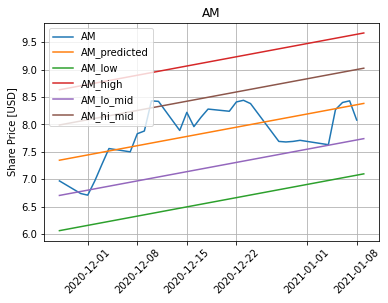

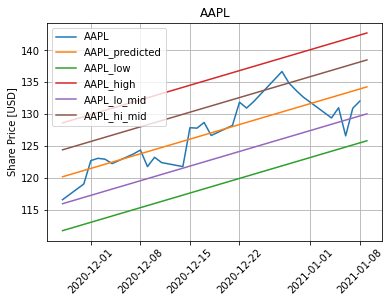

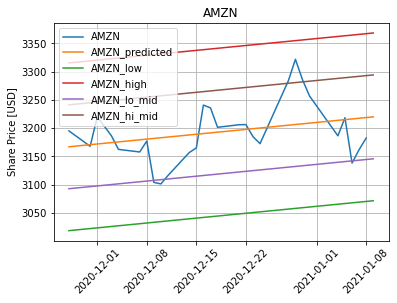

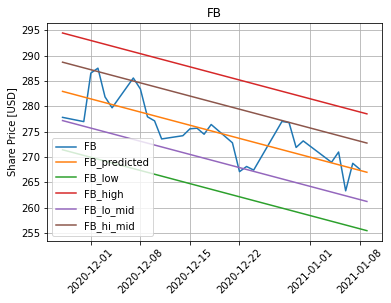

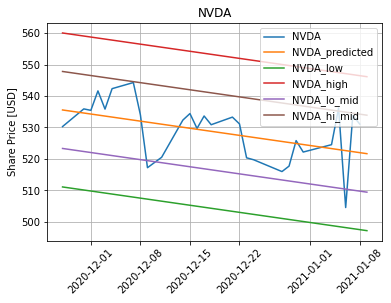

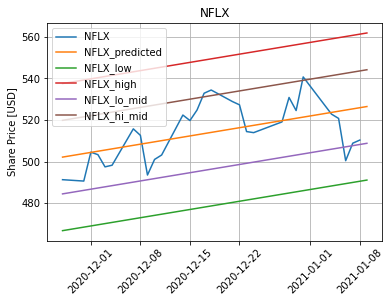

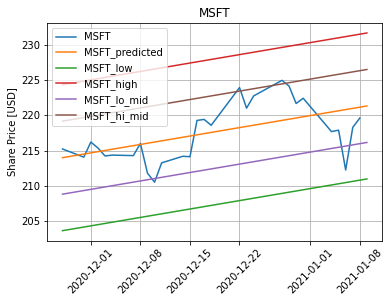

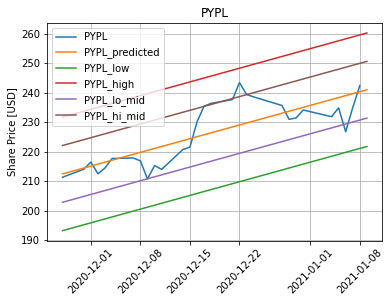

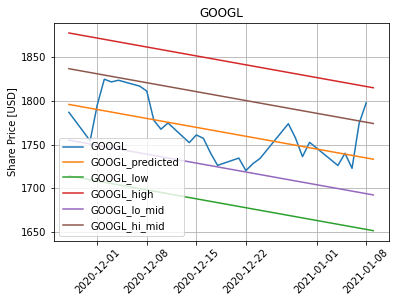

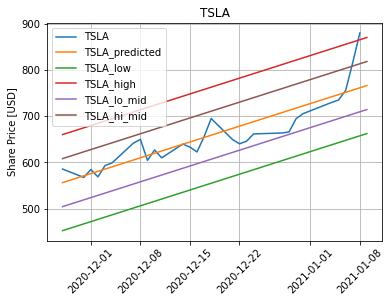

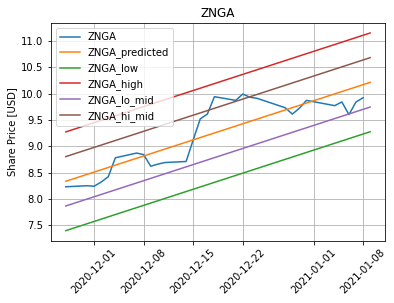

In [24]:
# Plot Open price vs. Time
num_plot=len(df.columns)
i=1
for item in df.columns:
    plt.figure()
    plt.plot(df_price[item])
    plt.plot(df_price_est_start_end[[item,item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid']])
    plt.legend([item,item+'_predicted',item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid'])
    plt.ylabel('Share Price [USD]')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.title(item)
    i=i+1

## Constructing the Portfolio

In order to balance the investments, we'd want to have the most benefit (reward) while minimizing volatility (risk).<br>
1. We can consider 'reward' to be the slope of the linear fit to share price (higher the slope, higher the gain).<br>
2. We can consider 'risk' to be the ratio between the price bounds and change in price over the duration of interest <br>
3. Hence we can compute a 'returns ratio' = 'reward'/'risk' for each listing; the higher this value, the more this investment is viable. <br>
4. Then we can compute the sum of the returns ratios for each listing and divide the returns ratio by the summed value, to determine the "weight" of each investment <br>
5. Finally we can multiply the "weight" by the total investment capital (total_investment) to obtain the recommended investment for each listing <br>    

### Use the Linear Regression object to construct the reward, volatility, returns ratio, weight and suggested investment values

In [25]:
# Initialize the portfolio dataframe df_portfolio and update the index suitably
df_portfolio=df_price_est_obj
df_portfolio=df_portfolio.reindex(['reward','risk','returns_ratio','weight','suggested_investment'])
df_portfolio=df_portfolio.rename_axis(index='Parameters')

# Update "reward" using the slope of the line fit (multiplied by a suitable factor for display)
for item in (df_portfolio.columns):
    df_portfolio.loc['reward',item]=(df_price_est_obj.loc['fit_obj',item].coef_[0])*10**17
    
# Update the "volatility" as the percent price bound
for item in (df_portfolio.columns):
    df_portfolio.loc['risk',item]=(df_price_est_obj.loc['bound',item])
                                         
# Update the returns ratio as the ratio between the "reward" and "volatility"
for item in (df_portfolio.columns):
    df_portfolio.loc['returns_ratio',item]=(df_portfolio.loc['reward',item]/
                                            df_portfolio.loc['risk',item])
    
# Remove those listings with negative returns_ratio since those imply a falling stock
df_price_est_end=price_est(df,df_price_est_obj,df_start,[df.index[-1].strftime('%m/%d/%y')])
for item in df_portfolio.columns:
    item_low_str=item+'_low'
    if df_portfolio.loc['reward',item]<=0 or df[item].iloc[-1]<=df_price_est_end[item_low_str].to_numpy()[0]:
        df_portfolio.pop(item)
        
# Obtain the weighted average of the returns ratio for each listing
for item in (df_portfolio.columns):
    df_portfolio.loc['weight',item]=df_portfolio.loc['returns_ratio',item]/df_portfolio.loc['returns_ratio',:].sum()

# Multiply the weight of each listing by the total investment capital to obtain the recommended investment
for item in (df_portfolio.columns):
    df_portfolio.loc['suggested_investment',item]=df_portfolio.loc['weight',item]*total_investment

# Display the portfolio dataframe
df_portfolio.sort_values(axis=1,by='weight',ascending=False).style.background_gradient(axis=1).format("{:.2f}")

,TSLA,ZNGA,AAPL,PYPL,AM,MSFT,NFLX,AMZN
Parameters,,,,,,,,
reward,964.98,614.12,325.38,363.37,400.03,91.66,133.14,44.59
risk,17.73,11.39,7.25,9.10,18.43,4.81,7.19,4.64
returns_ratio,54.42,53.92,44.89,39.92,21.70,19.06,18.51,9.60
weight,0.21,0.21,0.17,0.15,0.08,0.07,0.07,0.04
suggested_investment,623.25,617.58,514.12,457.19,248.59,218.33,212.00,109.95


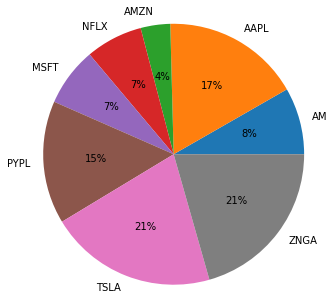

In [26]:
stock_labels=df_portfolio.columns
values=df_portfolio.loc['suggested_investment',:]
plt.pie(values, labels=stock_labels,radius=1.5, autopct='%1.0f%%');

In [27]:
df_portfolio.to_csv('portfolio.csv')

### What kind of volatility do the listings have?

 Refer the "volatility" row, higher the value, greater the volatility

### How do we use the data to construct our portfolio?

Refer the dataframe "df_portfolio"